# Loan Approval Analysis 

## Exploring factors influencing loan decisions

### Dataset Link
https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset

In [1]:
# Importing required Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset into pandas dataframe
df= pd.read_csv(r"F:\PYTHON_EXCEL_SQL_PBI_Projects\PYTHON_Projects\Loan Approval Analysis\loan_approval_dataset.csv")
df.head()

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected

## Data Cleaning

In [3]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### column names are not in one line means contains white spaces

#### Removing White spaces from column names & column values

In [4]:
# fetching column names to avoid spelling errors or spacing errors or white space errors
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Removing white space from column names
df.columns=df.columns.str.strip()
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [6]:
# Removing white space from column values
df=df.map(lambda x : x.strip() if isinstance(x, str) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
# checking descriptive stastics of a dataframe
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06             4.388966e+06   
min     300.000000             -1.000000e+05             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

### 'residential_assets_value' columns contain ' -ve ' values

In [8]:
# Convering -ve values of column into absolute values
df['residential_assets_value']=df['residential_assets_value'].abs()

# Checking for any Negative values left
(df['residential_assets_value']<0).sum()


0

In [9]:
# Ensure no -ve values
df.describe()

loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.473928e+06             4.973155e+06   
std     172.430401              6.502129e+06             4.388966e+06   
min     300.000000              0.000000e+00             0.000000e+00   
25%     453.000000              2.200000e+06             1.300000e+06   
50%     600.000000              5.600000e+06             3.700000e+06   
75%     748.000000              1.130000e+07             7.600000e+06   
max     900.000000              2.910000e+07             1.940000e+07   

       luxury_assets_value  bank_asset_value  
count         4.269000e+03      4.269000e+03  
mean          1.512631e+07      4.976692e+06  
std           9.103754e+06      3.250185e+06  
min           3.000000e+05      0.000000e+00  
25%           7.500000e+06      2.300000e+06  
50%           1.460000e+07      4.600000e+06  
75%           2.170000e+07      7.100000e+06  
max           3.920000e+07      1.470000e+07

In [10]:
# Checking duplicates
df.duplicated().sum()

0

In [11]:
# Adding new column to dataframe based on 'cibil_score' column
# Bucketing poor , average , god and excellant based on cibil rating column

def cibil_rating(value) :
    if 300<=value<=549 :
        return 'Poor'
        
    elif 550<=value<=649 :
         return 'Average'
        
    elif 650<=value<=749 :
         return 'Good'

    elif 750<=value<=900 :
         return 'Excellent'

    else:
        return 'Error'

df['cibil_ratings']=df['cibil_score'].apply(cibil_rating)
df.head()
 

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

  cibil_ratings  
0     Excellent  
1          Poor  
2          Poor  
3          Poor  
4          Poor

In [12]:
# Adding income level column based on 'income_annum' column
# Adding new column to dataframe
# Bucketing low , low-middle , upper-middle , high ,very high

def income_level(value) :
    if 100000<=value<=1000000 :
        return 'Low'
        
    elif 1000001<=value<=4000000 :
         return 'Low-Middle'
        
    elif 4000001<=value<=7500000 :
         return 'Upper-Middle'

    elif 7500001<=value<=10000000 :
         return 'High'

    else:
        return 'Very High'

df['income_levels']=df['income_annum'].apply(income_level)
df.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

  cibil_ratings income_levels  
0     Excellent          High  
1          Poor  Upper-Middle  
2          Poor          High  
3          Poor          High  
4          Poor          High

In [13]:
# Adding loan ratings column based on 'loan_amount' column
# Adding new column to dataframe
# Bucketing Bronze ,Silver , gold ,platinum

def loan_rating(value) :
    if 100000<=value<=10000000 :
        return 'Bronze'
        
    elif 10000001<=value<=20000000 :
         return 'Silver'
        
    elif 20000001<=value<=30000000 :
         return 'Gold'

    elif 30000001<=value<=40000000 :
         return 'Platinum'

    else:
        return 'Unknown'

df['loan_ratings']=df['loan_amount'].apply(loan_rating)
df.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

  cibil_ratings income_levels loan_ratings  
0     Excellent          High         Gold  
1          Poor  Upper-Middle       Silver  
2          Poor          High         Gold  
3          Poor          High     Platinum  
4          Poor          High         Gold

In [14]:
# Adding loan Term Type column based on 'loan term' column
# Adding new column to dataframe
# Bucketing Short term , Long term , Itermediate

def loan_term_range(value) :
    if 0 <=value<= 7 :
        return 'Short_Term'
        
    elif 8 <=value<= 14 :
         return 'Intermediate'
        
    elif 15 <=value<= 20 :
         return 'Long_Term'

    else:
        return 'Unknown'

df['loan_term_type']=df['loan_term'].apply(loan_term_range)
df.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

  cibil_ratings income_levels loan_ratings loan_term_type  
0     Excellent          High         Gold   Intermediate  
1          Poor  Upper-Middle       Silver   Intermediate  
2          Poor          High         Gold      Long_Term  
3          Poor          High     Platinum   Intermediate  
4          Poor          High         Gold      Long_Term

In [15]:
# Adding dependency level column based on 'no_of_dependents' column
# Adding new column to dataframe
# Bucketing Low , Moderate , High

def dependents(value) :
    if 0 <=value<= 1 :
        return 'Low'
        
    elif 2 <=value<= 3 :
         return 'Moderate'
        
    elif 4 <=value<= 5 :
         return 'High'

    else:
        return 'Unknown'

df['dependente_levels']=df['no_of_dependents'].apply(dependents)
df.head()

loan_id  no_of_dependents     education self_employed  income_annum  \
0        1                 2      Graduate            No       9600000   
1        2                 0  Not Graduate           Yes       4100000   
2        3                 3      Graduate            No       9100000   
3        4                 3      Graduate            No       8200000   
4        5                 5  Not Graduate           Yes       9800000   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     29900000         12          778                   2400000   
1     12200000          8          417                   2700000   
2     29700000         20          506                   7100000   
3     30700000          8          467                  18200000   
4     24200000         20          382                  12400000   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  \
0                 17600000             22700000           8000000    Approved   
1                  2200000              8800000           3300000    Rejected   
2                  4500000             33300000          12800000    Rejected   
3                  3300000             23300000           7900000    Rejected   
4                  8200000             29400000           5000000    Rejected   

  cibil_ratings income_levels loan_ratings loan_term_type dependente_levels  
0     Excellent          High         Gold   Intermediate          Moderate  
1          Poor  Upper-Middle       Silver   Intermediate               Low  
2          Poor          High         Gold      Long_Term          Moderate  
3          Poor          High     Platinum   Intermediate          Moderate  
4          Poor          High         Gold      Long_Term              High

# Exploratory Data Analysis

## Customer Segmentation

#### Income

In [16]:
# Grouping customer according to income levels
income=df['income_levels'].value_counts().reset_index()
income=income.rename(columns={'count':'Number_of_Applicants'})
income

income_levels  Number_of_Applicants
0  Upper-Middle                  1548
1    Low-Middle                  1284
2          High                  1047
3           Low                   390

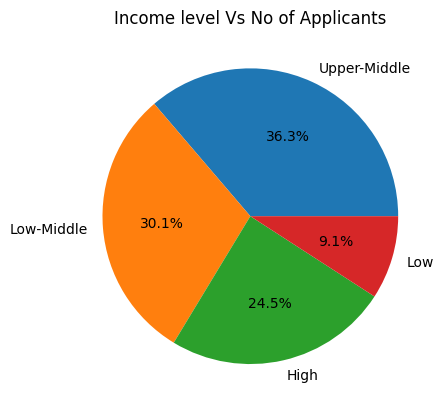

In [17]:
# plotting a pie chart
import matplotlib.pyplot as plt
plt.pie(income['Number_of_Applicants'] , labels=income['income_levels'] , autopct='%1.1f%%')

# tile to pie chart
plt.title('Income level Vs No of Applicants')
plt.show()

### Segment according to number of dependents

In [18]:
dependents=df['dependente_levels'].value_counts().reset_index()
dependents=dependents.rename(columns={'count':'Number Of Applicants'})
dependents

dependente_levels  Number Of Applicants
0          Moderate                  1435
1              High                  1425
2               Low                  1409

### Segment according to education

In [19]:
education=df['education'].value_counts().reset_index()
education=education.rename(columns={'education':'Education Level','count':'Number Of Applicants'})
education

Education Level  Number Of Applicants
0        Graduate                  2144
1    Not Graduate                  2125

### Segment according to Employment

In [20]:
employment=df['self_employed'].value_counts().reset_index()
employment=employment.rename(columns={'count':'Number Of Applicants'})
employment

self_employed  Number Of Applicants
0           Yes                  2150
1            No                  2119

### Rate of Loan Approval

In [21]:
loans=df['loan_status'].value_counts().reset_index()
loans=loans.rename(columns={'count':'Number Of Applicants'})
loans

loan_status  Number Of Applicants
0    Approved                  2656
1    Rejected                  1613

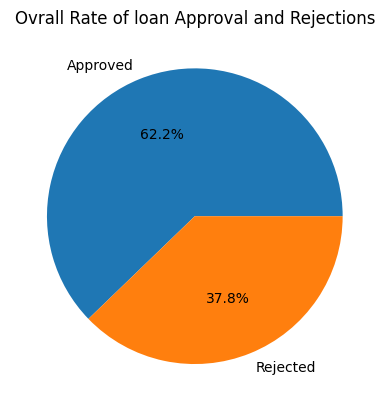

In [22]:
# plotting a pie chart
plt.pie(loans['Number Of Applicants'] , labels=loans['loan_status'] , autopct='%1.1f%%')

# tile to pie chart
plt.title('Ovrall Rate of loan Approval and Rejections')
plt.show()

### Loan Approvals according to level of education

In [23]:
# Grouping data by education and loan status
education=df.groupby(['education','loan_status']).size().reset_index()
education

education loan_status     0
0      Graduate    Approved  1339
1      Graduate    Rejected   805
2  Not Graduate    Approved  1317
3  Not Graduate    Rejected   808

In [24]:
# Filter only Approved
education[education['loan_status'].isin(['Approved'])]

education loan_status     0
0      Graduate    Approved  1339
2  Not Graduate    Approved  1317

In [25]:
# Filter only Approved
education=education[education['loan_status'].isin(['Approved', 'Rejected'])]
education=education.rename(columns={0:'Total'})
education

education loan_status  Total
0      Graduate    Approved   1339
1      Graduate    Rejected    805
2  Not Graduate    Approved   1317
3  Not Graduate    Rejected    808

In [26]:
# Creting Pivot table of above
pivot_table=education.pivot(index='education', columns='loan_status', values='Total')
pivot_table

loan_status   Approved  Rejected
education                       
Graduate          1339       805
Not Graduate      1317       808

In [27]:
row_totals=pivot_table.sum(axis=1)
row_totals

education
Graduate        2144
Not Graduate    2125
dtype: int64

In [28]:
percentage=pivot_table.div(row_totals,axis=0)*100
percentage

loan_status    Approved   Rejected
education                         
Graduate      62.453358  37.546642
Not Graduate  61.976471  38.023529

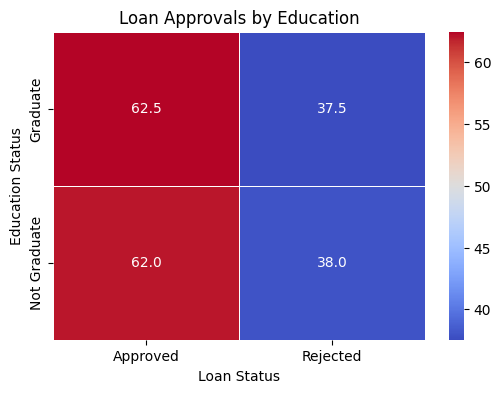

In [29]:
# Creating heatmop
plt.figure(figsize=(6,4))
sns.heatmap(percentage,annot=True, linewidth=0.5,fmt='.1f', cmap='coolwarm')

# Labeling Heatmap
plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')
plt.show()

### Loan Approval according to type of employment

In [30]:
employment_type=df.groupby(['self_employed','loan_status']).size().reset_index()

# Filter based on Approved or Rejected
employment_type=employment_type[employment_type['loan_status'].isin(['Approved', 'Rejected'])]
employment_type=employment_type.rename(columns={0:'Total'})
employment_type

self_employed loan_status  Total
0            No    Approved   1318
1            No    Rejected    801
2           Yes    Approved   1338
3           Yes    Rejected    812

In [31]:
# Creting Pivot table of above
pivot_table=employment_type.pivot(index='self_employed', columns='loan_status', values='Total')
row_totals=pivot_table.sum(axis=1)
percentage=pivot_table.div(row_totals,axis=0)*100
percentage

loan_status     Approved   Rejected
self_employed                      
No             62.199151  37.800849
Yes            62.232558  37.767442

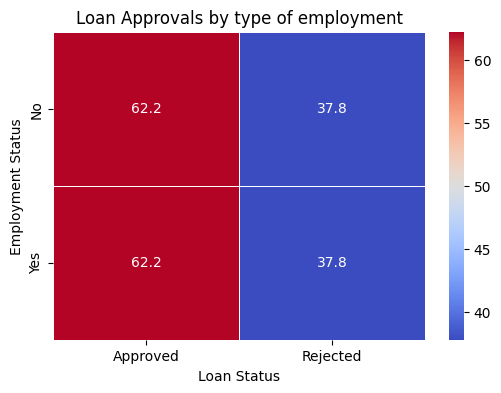

In [32]:
# Creating heatmop
plt.figure(figsize=(6,4))
sns.heatmap(percentage,annot=True, linewidth=0.5,fmt='.1f', cmap='coolwarm')

# Labeling Heatmap
plt.title('Loan Approvals by type of employment')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')
plt.show()


### Loan Approval rate by CIBIL rating

In [33]:
# influence of CIBIL ratings on loan Approval
# Group data according to CIBIL ratings and loan status and count for each combination
cibil_rates=df.groupby(['cibil_ratings','loan_status']).size().reset_index()
cibil_rates=cibil_rates.rename(columns={0:'Total'})
cibil_rates

cibil_ratings loan_status  Total
0       Average    Approved    681
1       Average    Rejected      2
2     Excellent    Approved   1050
3     Excellent    Rejected      6
4          Good    Approved    740
5          Good    Rejected      5
6          Poor    Approved    185
7          Poor    Rejected   1600

In [34]:
# Creting Pivot table of above
pivot_table=cibil_rates.pivot(index='cibil_ratings', columns='loan_status', values='Total')
pivot_table

loan_status    Approved  Rejected
cibil_ratings                    
Average             681         2
Excellent          1050         6
Good                740         5
Poor                185      1600

In [35]:
# Calculating Approval rate
pivot_table['Approval Rate']=pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) *100
pivot_table

loan_status    Approved  Rejected  Approval Rate
cibil_ratings                                   
Average             681         2      99.707174
Excellent          1050         6      99.431818
Good                740         5      99.328859
Poor                185      1600      10.364146

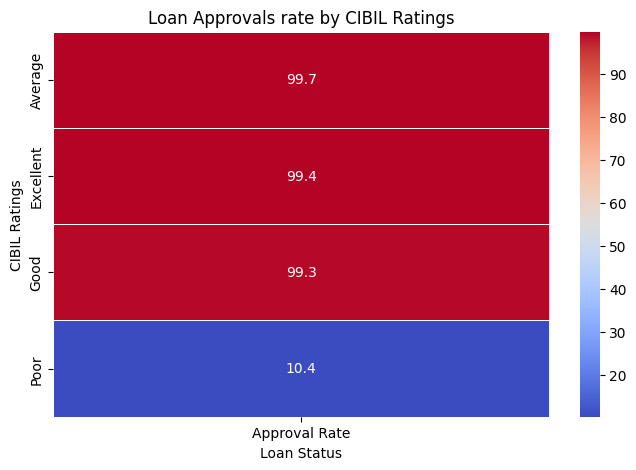

In [36]:
# Creating heatmop
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']],annot=True, linewidth=0.5,fmt='.1f', cmap='coolwarm')

# Labeling Heatmap
plt.title('Loan Approvals rate by CIBIL Ratings')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Ratings')
plt.show()

##### If u have either Average , excellent ,good CIIL Ratings then we have 99% chance of loan getting Approved
##### if we have poor CIBIL Ratings only we have 10% of chances of loan getting aprroved

## Corelation Analysis
##### Gets relationships between two Numerical columns

In [37]:
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix

loan_id  no_of_dependents  income_annum  \
loan_id                   1.000000          0.005326      0.012592   
no_of_dependents          0.005326          1.000000      0.007266   
income_annum              0.012592          0.007266      1.000000   
loan_amount               0.008170         -0.003366      0.927470   
loan_term                 0.009809         -0.020111      0.011488   
cibil_score               0.016323         -0.009998     -0.023034   
residential_assets_value  0.020953          0.007390      0.636824   
commercial_assets_value   0.018595         -0.001531      0.640328   
luxury_assets_value      -0.000862          0.002817      0.929145   
bank_asset_value          0.010765          0.011163      0.851093   

                          loan_amount  loan_term  cibil_score  \
loan_id                      0.008170   0.009809     0.016323   
no_of_dependents            -0.003366  -0.020111    -0.009998   
income_annum                 0.927470   0.011488    -0.023034   
loan_amount                  1.000000   0.008437    -0.017035   
loan_term                    0.008437   1.000000     0.007810   
cibil_score                 -0.017035   0.007810     1.000000   
residential_assets_value     0.594582   0.008008    -0.019907   
commercial_assets_value      0.603188  -0.005478    -0.003769   
luxury_assets_value          0.860914   0.012490    -0.028618   
bank_asset_value             0.788122   0.017177    -0.015478   

                          residential_assets_value  commercial_assets_value  \
loan_id                                   0.020953                 0.018595   
no_of_dependents                          0.007390                -0.001531   
income_annum                              0.636824                 0.640328   
loan_amount                               0.594582                 0.603188   
loan_term                                 0.008008                -0.005478   
cibil_score                              -0.019907                -0.003769   
residential_assets_value                  1.000000                 0.414799   
commercial_assets_value                   0.414799                 1.000000   
luxury_assets_value                       0.590919                 0.591128   
bank_asset_value                          0.527401                 0.548576   

                          luxury_assets_value  bank_asset_value  
loan_id                             -0.000862          0.010765  
no_of_dependents                     0.002817          0.011163  
income_annum                         0.929145          0.851093  
loan_amount                          0.860914          0.788122  
loan_term                            0.012490          0.017177  
cibil_score                         -0.028618         -0.015478  
residential_assets_value             0.590919          0.527401  
commercial_assets_value              0.591128          0.548576  
luxury_assets_value                  1.000000          0.788517  
bank_asset_value                     0.788517          1.000000

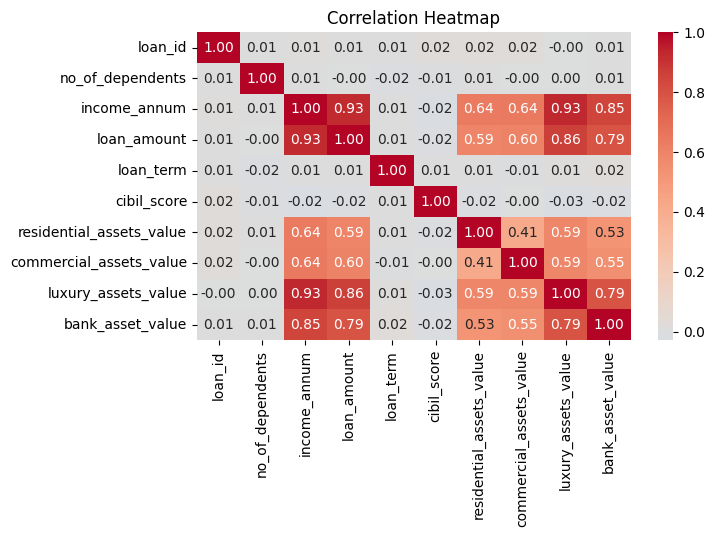

In [38]:
# Creating Heatmap

plt.figure(figsize=(7,4))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm',fmt='.2f', center=0 )

# Labeling Heatmap
plt.title('Correlation Heatmap')
plt.show()


##### The relation between 'Income_annum' & 'loan_amount' is 0.93 & it is strong correlation
##### If 'Income_annum' increases more chances of getting loan

In [39]:
# Correlation between Asset value & loan_amount
# joining two dfs
assets=['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
loan=['loan_amount']

assets+loan

['residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_amount']

In [40]:
df[assets+loan]

residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000             22700000   
1                      2700000                  2200000              8800000   
2                      7100000                  4500000             33300000   
3                     18200000                  3300000             23300000   
4                     12400000                  8200000             29400000   
...                        ...                      ...                  ...   
4264                   2800000                   500000              3300000   
4265                   4200000                  2900000             11000000   
4266                   1200000                 12400000             18100000   
4267                   8200000                   700000             14100000   
4268                  17800000                 11800000             35700000   

      bank_asset_value  loan_amount  
0              8000000     29900000  
1              3300000     12200000  
2             12800000     29700000  
3              7900000     30700000  
4              5000000     24200000  
...                ...          ...  
4264            800000      2300000  
4265           1900000     11300000  
4266           7300000     23900000  
4267           5800000     12800000  
4268          12000000     29700000  

[4269 rows x 5 columns]

In [41]:
# Calculate the correlation (Pearson Correlation)
corr=df[assets+loan].corr()
corr

residential_assets_value  commercial_assets_value  \
residential_assets_value                  1.000000                 0.414799   
commercial_assets_value                   0.414799                 1.000000   
luxury_assets_value                       0.590919                 0.591128   
bank_asset_value                          0.527401                 0.548576   
loan_amount                               0.594582                 0.603188   

                          luxury_assets_value  bank_asset_value  loan_amount  
residential_assets_value             0.590919          0.527401     0.594582  
commercial_assets_value              0.591128          0.548576     0.603188  
luxury_assets_value                  1.000000          0.788517     0.860914  
bank_asset_value                     0.788517          1.000000     0.788122  
loan_amount                          0.860914          0.788122     1.000000

## Asset value impact on loan approval
#### if there is a relation between asset value and loan approval

In [46]:
# Splitting data into two groups based on loan status
Approved=df[df['loan_status']=='Approved']
Rejected=df[df['loan_status']=='Rejected']

# Perform a t-test
assets=['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
from scipy.stats import ttest_ind
for column in assets:
    t_stat , p_value=ttest_ind(Approved[column],Rejected[column], equal_var=False )
    print(f"T-Test for {column} :")
    print(f"T-Stastics :{t_stat}")
    print(f"P-Value : {p_value}")
    if p_value < 0.05 : # 95% confidence level
        print(f"The difference in {column} between Approved and Rejected loans statistically significant ")

    else:
        print(f"The difference in {column} between Approved and Rejected loans not statistically significant ")
    print("\n")

T-Test for residential_assets_value :
T-Stastics :-0.9399394365500209
P-Value : 0.34731539500224484
The difference in residential_assets_value between Approved and Rejected loans not statistically significant 


T-Test for commercial_assets_value :
T-Stastics :0.5387741456120381
P-Value : 0.5900779272018966
The difference in commercial_assets_value between Approved and Rejected loans not statistically significant 


T-Test for luxury_assets_value :
T-Stastics :-1.013970039592796
P-Value : 0.3106683217824068
The difference in luxury_assets_value between Approved and Rejected loans not statistically significant 


T-Test for bank_asset_value :
T-Stastics :-0.4448616890142232
P-Value : 0.6564475917396153
The difference in bank_asset_value between Approved and Rejected loans not statistically significant 




##### If the results are not statistically significant, it means that the relationship between the two variables are likely due to chance.

### Using ANOVA to determine a corelation between income & asset value

In [53]:
# Null hypotesis= there is no relation between assets value and income
# Alternative hypotesis= there exist relationship between assets value and income

# Extracting values in columns
residential_assets=df['residential_assets_value'] 
commercial_assets=df['commercial_assets_value']
luxury_assets=df['luxury_assets_value']
bank_asset=df['bank_asset_value']
income=df['income_annum']

# Perform ANOVA
from scipy.stats import f_oneway
f_stastics, p_value=f_oneway(residential_assets,commercial_assets,luxury_assets,bank_asset,income)
print('The f_stastics :',f_stastics)
print('The p_value is :',p_value)
if p_value < 0.05 :
    print('There is a significant influence of income on asset value')

else:
    print('There is no significant influence of income on asset value')
        
print("\n")
        
 

The f_stastics : 2518.654468935116
The p_value is : 0.0
There is a significant influence of income on asset value




In [43]:

%pprint

Pretty printing has been turned OFF


In [44]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'cibil_ratings', 'income_levels', 'loan_ratings', 'loan_term_type',
       'dependente_levels'],
      dtype='object')